In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sh6147782_winequalityred_path = kagglehub.dataset_download('sh6147782/winequalityred')

print('Data source import complete.')


## Crash Course in Causality

### Abstract

The "Crash Course in Causality" notebook integrates theoretical concepts, practical implementations, and real-world applications to explore data preparation for causal analysis in machine learning. This chapter demonstrates the transition from traditional correlation-based models to causality-driven approaches using the Wine Quality dataset. Key topics include handling missing data, feature selection, and encoding categorical variables within a causal framework. Through exploratory data analysis, feature importance analysis, and causal techniques such as propensity score matching, the notebook examines the impact of variables like alcohol and sulphates on wine quality. By combining domain knowledge with machine learning and statistical methods, the notebook empowers practitioners to develop robust, interpretable, and actionable models that address complex real-world challenges effectively.


### What is Causality?

Causality is the study of cause-and-effect relationships, focusing on understanding how one event, action, or variable influences another. It addresses questions like "Why did this happen?" and "What would happen if we changed this input?" Unlike correlation, which only identifies patterns or associations, causality explains the mechanisms behind those patterns.

At its core, causality establishes a direct connection between a **cause** (the reason) and its **effect** (the result). For example:
- **Cause:** A smoker consumes cigarettes daily.
- **Effect:** The smoker develops lung cancer due to the harmful chemicals in tobacco.

This is different from correlation, which only identifies patterns or statistical relationships between two variables but does not explain the underlying mechanism.

**Example of Correlation Without Causation:**
- Ice cream sales and drowning incidents increase during the summer. While these two variables are correlated, eating ice cream does not cause drowning. The true cause (confounding variable) is the hot summer weather, which drives both higher ice cream sales and swimming activity, leading to more drowning incidents.

Causality, therefore, allows us to move beyond "what is happening" to "why it is happening." This understanding is critical for making decisions that lead to desired outcomes, such as improving public health, optimizing business strategies, or addressing social inequalities.

---

#### Key Characteristics of Causality
1. **Directionality:**
   - In causality, there is a clear direction: the cause precedes the effect. For example, taking medication (cause) reduces fever (effect). The reverse does not hold true—having a fever does not cause medication intake.
   
2. **Mechanism:**
   - Causality seeks to uncover the mechanism or process through which the cause produces the effect. For instance, in biology, a virus causes illness by attacking cells in the body.

3. **Intervention-Driven:**
   - A causal relationship remains valid when we intervene to manipulate the cause. For example, reducing smoking leads to a decline in lung cancer rates, confirming the causal link between smoking and cancer.

---

#### Why is Causality Difficult to Establish?
Establishing causality is often more complex than identifying correlation because it requires:
1. **Evidence of Directionality:** The cause must precede the effect in time.
2. **Controlling for Confounders:** External factors that influence both the cause and the effect must be identified and accounted for. For example, in the ice cream and drowning example, the confounder is summer.
3. **Experimental Design:** Causal relationships are most effectively established through controlled experiments (e.g., randomized controlled trials in medicine).

In real-world scenarios, experiments may not always be feasible due to ethical, practical, or financial constraints. For instance:
- In healthcare, we cannot expose people to harmful substances just to study their effects.
- In economics, conducting large-scale experiments on taxation policies may disrupt the economy.

This makes observational data, along with advanced causal inference techniques, an essential tool for establishing causality.


---

#### Examples of Causality in Everyday Life
1. **Weather and Farming:**
   - **Causal Relationship:** Rainfall leads to better crop yields by providing essential water to plants.
   - **Non-Causal Example:** An observed correlation between the number of frogs and crop yields (frogs appear during rainy seasons but do not cause crops to grow).

2. **Healthcare:**
   - **Causal Relationship:** Regular exercise improves cardiovascular health.
   - **Non-Causal Example:** A correlation between gym memberships and better health outcomes (wealthier individuals can afford gyms, which may lead to healthier lifestyles).

3. **Technology:**
   - **Causal Relationship:** Faster internet speeds improve video streaming quality.
   - **Non-Causal Example:** A correlation between the number of smart devices and energy consumption in a household (more devices indirectly increase consumption, but one does not cause the other).

---

#### Importance of Understanding Causality
Causality is the foundation of reasoning and decision-making in many fields:
1. **Science and Medicine:** Enables the development of treatments by understanding disease mechanisms (e.g., discovering that viruses cause infections).
2. **Public Policy:** Guides interventions such as reducing pollution to improve public health.
3. **Business and Marketing:** Informs strategies like lowering prices to boost sales or targeting ads to specific demographics.

Understanding causality allows us to:
- Make informed predictions about the future.
- Design interventions that change outcomes.
- Avoid misleading conclusions based on spurious correlations.


### Introduction to Causality

## Why Causality ?



Causality refers to the relationship between cause and effect—understanding how one event or action influences another. It addresses questions like "What caused this outcome?" and "What would happen if we changed this input?" Unlike correlation, which only identifies patterns or associations, causality explains the mechanisms behind those patterns.

For example:
- **Correlation:** Ice cream sales and drowning incidents both increase in the summer, but one does not cause the other.
- **Causality:** Smoking leads to lung cancer because it damages lung tissue, establishing a cause-and-effect relationship.

Causality helps us move beyond observing "what happened" to understanding "why it happened," enabling better predictions, interventions, and decisions in complex systems.

---

#### Why is Causality Essential in Machine Learning?

Machine learning models often rely on correlations in data to make predictions, but correlations can be misleading if they arise from confounding factors or spurious relationships. Without causal insights, models risk making inaccurate or biased predictions, which can have serious consequences in real-world applications.

Consider these scenarios:
1. **Healthcare:** A model might recommend expensive treatments based on correlated patient data without understanding the actual causes of a disease, leading to poor medical decisions.
2. **Finance:** A stock price prediction model might overfit to market trends without considering underlying economic factors, resulting in unreliable forecasts.
3. **Fairness:** A hiring algorithm might favor candidates from privileged backgrounds due to historical biases in the training data, perpetuating inequality.

Causality is essential in machine learning because it:
1. Improves model interpretability by revealing how features influence outcomes.
2. Enables effective interventions by identifying the root causes of problems.
3. Reduces the risk of biased or unethical predictions by addressing hidden confounders.

By focusing on "why" rather than just "what," causality empowers machine learning models to provide insights that are actionable, fair, and robust.

---

#### What is Causality in Machine Learning?

Causality in machine learning goes beyond pattern recognition to explore the relationships that drive predictions. It involves:
1. **Identifying causal relationships:** Understanding which features directly influence the target variable, as opposed to merely correlating with it.
2. **Handling confounding variables:** Accounting for external factors that may distort the observed relationships between variables.
3. **Counterfactual reasoning:** Asking "what-if" questions to predict how outcomes wo

![image.png](attachment:24d2a059-cb3c-4d36-9f2a-1b54ad9b378c.png)![image.png](attachment:c8d20ff1-0dd2-4699-89ca-ea6e52e49f59.png)uld change under different scenarios.

For example:
- In an e-commerce setting, a causal model might help answer, "What would happen to sales if we reduced the price of a product?" instead of merely predicting future sales based on historical trends.

Key components of causality in machine learning include:
1. **Causal diagrams:** Graphical representations, such as Directed Acyclic Graphs (DAGs), to map out cause-and-effect relationships between variables.
2. **Intervention analysis:** Simulating changes to inputs (e.g., pricing strategies, policies) to evaluate their impact on outcomes.
3. **Counterfactual analysis:** Exploring hypothetical scenarios to understand what would have happened under different conditions.

By integrating causal reasoning into machine learning, we can design systems that are not only accurate but also ethical, interpretable, and aligned with real-world needs.

---

#### Summary

Causality is the cornerstone of understanding the "why" behind observed phenomena. While machine learning excels at recognizing patterns, integrating causality ensures that models make robust, actionable, and unbiased predictions. Through causal reasoning, we can design systems that address complex questions, guide interventions, and ultimately lead to better decision-making across domains like healthcare, finance, and public policy.


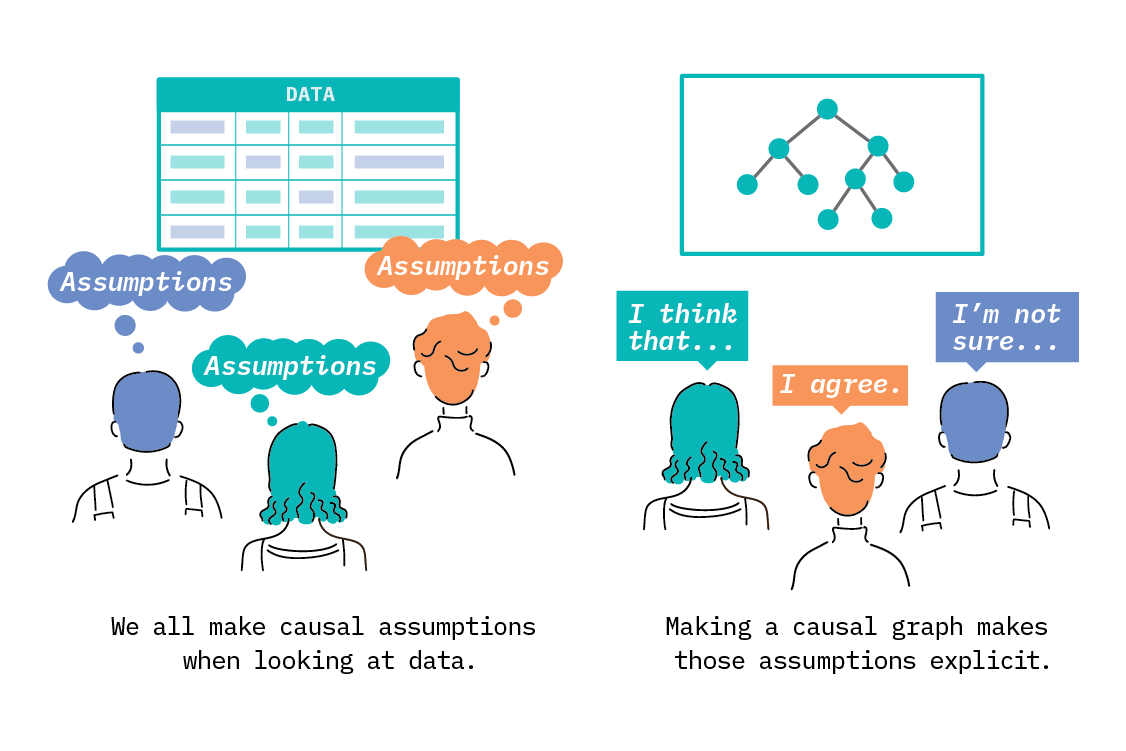
### Why is Causality Important in Machine Learning?

Machine learning models excel at identifying patterns and making predictions based on large datasets. However, these models typically rely on correlations in the data, which can sometimes lead to misleading conclusions. Understanding causality allows us to move beyond mere patterns to uncover the actual cause-and-effect relationships, ensuring that machine learning models are reliable, interpretable, and actionable.

#### Key Reasons Why Causality Matters:

1. **Avoiding Spurious Correlations:**
   - Machine learning algorithms often pick up on spurious correlations—relationships in the data that appear significant but are not causal. This can lead to incorrect predictions and decisions.
   - **Example:** Imagine an ML model predicting that ice cream sales lead to drowning incidents. While these variables may correlate (both increase in summer), the true cause is the weather (summer heat increases swimming activity and ice cream consumption). A causal model would identify the weather as the driving factor, not ice cream sales.

   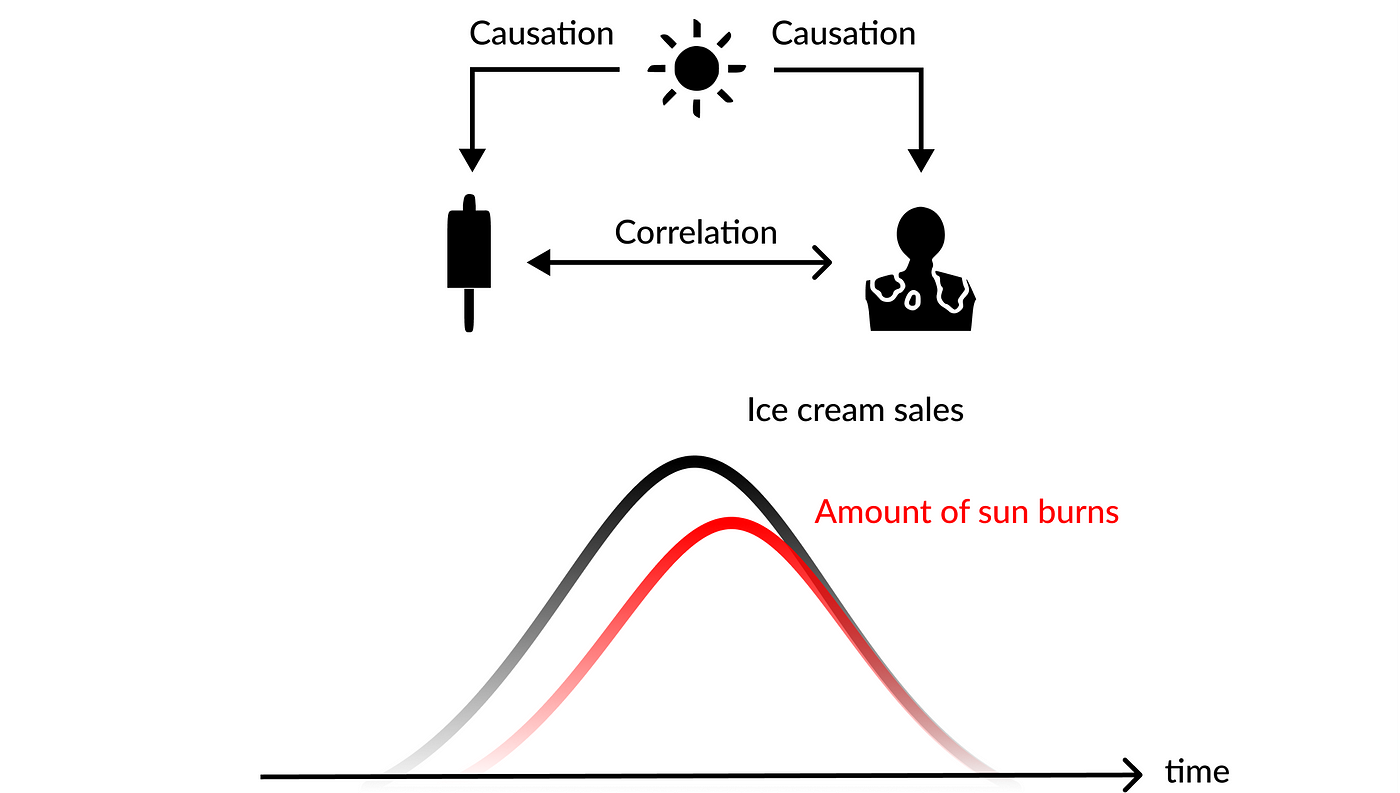

2. **Improving Model Interpretability:**
   - Understanding causality helps us explain **why** a model makes certain predictions. This is particularly important in domains like healthcare or finance, where understanding the reasoning behind decisions is as important as the decisions themselves.
   - **Example:** A healthcare ML model might predict that patients taking a certain medication recover faster. However, without causality, it might fail to consider that these patients may already be healthier or have access to better healthcare. A causal analysis could reveal the true effectiveness of the medication.

3. **Making Reliable Predictions in Changing Environments:**
   - Models trained on past data often struggle when the environment changes. By focusing on causal relationships, models can generalize better because causal factors remain consistent even when external conditions vary.
   - **Example:** In marketing, a model trained on past data may predict that increasing social media ads leads to higher sales. However, if customer behavior changes (e.g., a trend shift), the correlation may no longer hold. A causal model could identify underlying factors like product quality or brand loyalty that consistently drive sales, regardless of trends.

    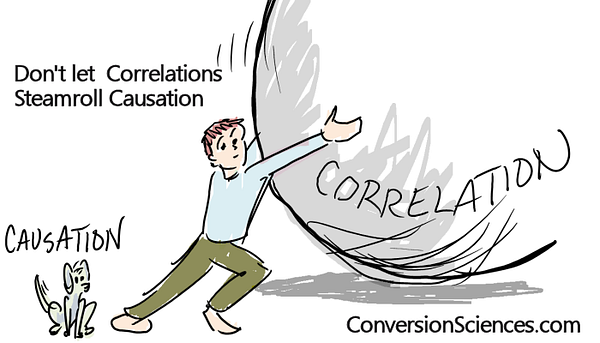

4. **Designing Effective Interventions:**
   - Causality enables us to test and predict the impact of interventions. This is critical when making decisions that affect outcomes, such as adjusting prices, launching new products, or implementing public policies.
   - **Example:** An e-commerce company wants to know if offering free shipping increases customer purchases. A causal approach, such as an A/B test, can isolate the effect of free shipping by comparing customers who receive it versus those who don’t, accounting for other factors like product popularity or customer location.

5. **Mitigating Bias and Ensuring Fairness:**
   - Without causality, ML models may inadvertently learn biases present in historical data. Understanding causality allows us to identify and correct these biases.
   - **Example:** A hiring algorithm trained on historical data might favor candidates from privileged backgrounds. A causal analysis could reveal that this bias is driven by factors like education level, which correlates with privilege but may not directly impact job performance. Adjusting for such biases ensures fairer predictions.

---

#### Implementing Causality in Machine Learning for Loan Defaults

To implement causality in diagnosing loan defaults, the bank can follow these steps:

1. **Data Collection and Preparation:**
   - Gather data on borrowers, including demographics, income, repayment history, and external factors like regional unemployment rates.
   - Clean and preprocess the data to ensure accuracy and consistency.

2. **Causal Diagram Creation:**
   - Construct a causal diagram, such as a Directed Acyclic Graph (DAG), to map out the relationships between variables. For example:
     - Borrower income → Loan repayment ability → Loan default
     - Regional unemployment → Borrower income → Loan default
   - This step helps identify confounders (e.g., economic conditions) that could affect both borrower income and defaults.

3. **Intervention Analysis:**
   - Simulate potential interventions to test their impact. For instance:
     - Lowering interest rates for a specific group of borrowers.
     - Offering repayment flexibility during economic downturns.
   - Use causal inference techniques, such as propensity score matching or instrumental variable analysis, to measure the effect of these interventions.

4. **Counterfactual Thinking:**
   - Ask "what-if" questions to explore alternative scenarios:
     - "What if this borrower had received a lower interest rate?"
     - "What if we had delayed the repayment deadline by three months?"
   - Counterfactual analysis helps identify the most effective strategies to reduce defaults.

5. **Iterative Learning:**
   - Continuously refine the causal model by incorporating new data and feedback from interventions. This ensures that the model remains relevant and accurate as external conditions change.

---

### An Example of Causality in Machine Learning: Diagnosing Loan Defaults

Let’s consider a scenario where a bank uses a machine learning (ML) model to predict whether customers will default on their loans. While such a model can identify patterns in historical data, it often relies on correlations, which may not fully explain why certain customers default. To make better decisions, the bank needs to understand the underlying causes of defaults, and this is where causality in machine learning comes into play.

---

#### Understanding Loan Defaults

Loan defaults are influenced by various factors, some of which are observable (e.g., income levels, credit scores) and others that may be hidden (e.g., financial emergencies, sudden job loss). The causal relationships between these factors can be visualized using a structured process, as shown in the diagram below:


1. **The Borrower’s Dilemma (Node 1):**
   - This represents the challenges faced by borrowers, such as unexpected expenses or unstable income. These are direct causes that impact a borrower's ability to repay loans.
   - For example, a borrower with a sudden medical emergency may default despite having a good credit history.

2. **The Lender’s Perspective (Node 2):**
   - From the lender's viewpoint, understanding why borrowers default is critical for minimizing financial risk. Factors like high interest rates, strict repayment terms, or insufficient borrower support may indirectly lead to defaults.
   - A causal approach helps lenders identify which of their policies contribute to default rates and which interventions could reduce them.

3. **Analyzing Default Patterns (Node 3):**
   - Machine learning models excel at analyzing default patterns in historical data. For instance, a model might find that customers in a specific zip code are more likely to default. However, correlation-based models cannot explain why this occurs.
   - By applying causal inference, the bank can determine whether defaults in that area are caused by economic conditions, employment trends, or biased lending practices.

4. **Examples to Illustrate Concepts (Node 4):**
   - Causal analysis enables the bank to ask "what-if" questions and test hypotheses. For example:
     - "What if we lower interest rates for low-income borrowers?"
     - "What if we extend loan repayment periods for customers with sudden job loss?"
   - These scenarios allow the bank to simulate interventions and predict their effects before implementation.

5. **Mitigation Strategies (Node 5):**
   - The final step is to design strategies based on causal insights. For example:
     - Introducing financial education programs to improve borrowers’ budgeting skills.
     - Adjusting loan terms for high-risk groups identified through causal analysis.
   - Causal models provide actionable insights to ensure that interventions effectively reduce defaults without introducing unintended consequences.

---

#### Summary of the Loan Default Example

This example illustrates how causality in machine learning provides a deeper understanding of loan defaults. Instead of relying solely on patterns, it allows the bank to:
1. Identify the root causes of defaults.
2. Design effective, fair, and actionable interventions.
3. Build trust with borrowers by addressing their needs proactively.

By integrating causal analysis into machine learning workflows, organizations can move beyond prediction to make decisions that are ethical, data-driven, and impactful.


---

#### Why Should People Care About Causality in ML:

- **Accuracy:** A model that understands causality makes better predictions that hold true in different scenarios.
- **Ethics:** Causal reasoning helps prevent unfair or biased outcomes, ensuring decisions are just and equitable.
- **Actionability:** Causal models provide actionable insights that guide real-world decisions, such as launching effective marketing campaigns or designing better public policies.

By incorporating causality into machine learning, we can build systems that not only make accurate predictions but also provide a deeper understanding of the relationships in the data, leading to more reliable, fair, and impactful decisions.


### Confounding Variables

A **confounding variable** is a hidden factor that influences both the cause (independent variable) and the effect (dependent variable), creating a false impression of a direct relationship between the two. Confounding variables can distort the results of machine learning models, leading to inaccurate predictions and ineffective interventions.

#### What are Confounding Variables?

Confounding variables interfere with the relationship we are trying to analyze. They can make it appear as though one variable is directly influencing another, when, in fact, the effect is due to a third, unaccounted-for variable.

- **Example of a Confounder:**
  - A study finds a correlation between coffee consumption and heart disease. Without causal analysis, one might conclude that drinking coffee causes heart disease. However, smoking, a confounder, could be influencing both variables—smokers are more likely to drink coffee and also have a higher risk of heart disease.

#### How Confounding Variables Affect Outcomes

The following diagram provides a clear visualization of how confounding variables can influence both independent and dependent variables in an experimental setup:



In this example:
- **Independent Variable:** Represents the experimental conditions we control (e.g., comparing Design A vs. Design B in a UX test).
- **Dependent Variable:** Represents the outcomes we measure (e.g., clickthrough rate or task success rate).
- **Confounding Variable:** Represents variables we don’t control or measure but that influence both the independent and dependent variables (e.g., time o

### Illustration of Confounding Variables in UX Research

The image illustrates a fundamental concept in UX research: how confounding variables can impact research outcomes and complicate our understanding of cause-and-effect relationships.

---

### Core Components

The diagram presents three key elements that interact in UX research studies:

1. **Independent Variable (Blue)**:
   - Represents the experimental conditions that researchers actively control.
   - Examples include comparing Design A versus Design B or testing with different user age groups.

2. **Dependent Variable (Pink)**:
   - Represents the measurable outcomes researchers track.
   - Examples include metrics like clickthrough rates, task success rates, and completion times.

3. **Confounding Variables (Purple)**:
   - Represents factors that researchers neither control nor measure but which can significantly influence both independent and dependent variables.
   - Examples include external factors like time of day, participants’ income levels, or environmental distractions.

---

### Confounding Variables Impact

- Confounding variables create a **complex web of influence** in UX research.
- They can affect:
  - The independent variable (what is manipulated).
  - The dependent variable (what is measured).
- This complexity can distort or obscure the relationships researchers aim to study, leading to challenges in identifying true causal relationships.

---

### Research Implications

The relationship structure highlights why UX research findings can be difficult to interpret:
- The **direct influence line** between independent and dependent variables represents the desired relationship researchers aim to study.
- The **additional arrows** from confounding variables show how external factors can muddy these relationships.
- This explains:
  - Why seemingly straightforward A/B tests might yield unexpected results.
  - Why research outcomes may vary across contexts or user groups.

---

### Practical Considerations

The diagram emphasizes several practical points for improving UX research rigor:
1. **Recognizing Confounding Variables**:
   - Identify potential confounders before designing the research.
   
2. **Controlling for Confounders**:
   - Use strategies to minimize their impact, such as randomization or stratification.
   
3. **Interpreting Results**:
   - Account for confounding variables when analyzing findings.

4. **Complexity of Causal Relationships**:
   - Accept that causal relationships in UX research are often more nuanced than they initially appear.

---

### Conclusion

By understanding the role of confounding variables, UX researchers can:
- Design more rigorous experiments.
- Interpret findings more accurately.
- Make better-informed design decisions based on research results.
This understanding is crucial for ensuring robust and reliable UX insights.


- f day or user income).

This diagram illustrates how confounders can create misleading relationships if not accounted for in the analysis. For example, users testing Design A might access the website during peak hours (higher activity), while Design B is tested during off-hours, skewing the results.

---

#### Why Confounders Matter in Machine Learning

In machine learning, confounding variables can bias models and lead to unreliable results. Failing to address confounders can result in:
1. **Biased Predictions:** Predictions influenced by hidden relationships instead of true causal factors.
2. **Misleading Insights:** Incorrect conclusions about which features influence outcomes.
3. **Ineffective Interventions:** Recommendations based on spurious relationships that fail to address the root cause.

- **Real-World Example in Loan Defaults:**
  - A machine learning model might predict that borrowers in a specific zip code are more likely to default. However, regional unemployment (a confounding variable) could be influencing both income levels and default rates. Without addressing this confounder, the model might unfairly penalize borrowers based on location instead of addressing the true issue—economic conditions.

---


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequalityred/winequality-red.csv


In [ ]:
!pip install causalinference
!pip install dowhy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.5/297.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 86.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
# General libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning and causal inference libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel
import networkx as nx


In [ ]:
data =  pd.read_csv("/kaggle/input/winequalityred/winequality-red.csv")
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB
None


In [ ]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1596.000000       1596.000000  1596.000000     1596.000000   
mean        8.314160          0.527954     0.270276        2.535558   
std         1.732203          0.179176     0.193894        1.405515   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.600000          1.580000     0.790000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1596.000000          1596.000000           1596.000000  1596.000000   
mean      0.087120            15.858396             46.382206     0.996744   
std       0.045251            10.460554             32.839138     0.001888   
min       0.012000             1.000000         

### Explanation:
- The dataset is loaded using `pd.read_csv`.
- `info()` provides a summary of the dataset, including column names, data types, and missing values.
- `describe()` gives statistical summaries of numeric columns, such as mean, standard deviation, and quartiles.
This step helps understand the dataset structure and identify potential preprocessing needs.


In [ ]:
# Simulate missing data for demonstration
data_missing = data.copy()
data_missing.loc[10:20, 'alcohol'] = None

# Impute missing values using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data_missing), columns=data.columns)

# Check that missing values are handled
print("Missing Values After Imputation:")
print(data_imputed.isnull().sum())


Missing Values After Imputation:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Explanation:
- The dataset is loaded using `pd.read_csv`.
- `info()` provides a summary of the dataset, including column names, data types, and missing values.
- `describe()` gives statistical summaries of numeric columns, such as mean, standard deviation, and quartiles.
This step helps understand the dataset structure and identify potential preprocessing needs.


In [ ]:
# Simulate missing data for demonstration
data_missing = data.copy()
data_missing.loc[10:20, 'alcohol'] = None

# Impute missing values using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data_missing), columns=data.columns)

# Check that missing values are handled
print("Missing Values After Imputation:")
print(data_imputed.isnull().sum())


Missing Values After Imputation:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Explanation:
1. **Simulate Missing Data**:
   - Intentionally creates missing values in the `alcohol` column for demonstration.
2. **KNN Imputation**:
   - Uses the KNN algorithm to impute missing values by averaging the nearest neighbors.
3. **Result**:
   - The missing values are filled, and `isnull().sum()` confirms that no missing values remain.
This step ensures the dataset is complete for further analysis.


### NetworkX Library


The library used in the provided code snippet is **NetworkX**, a powerful Python library designed for the creation, manipulation, and analysis of complex networks and graphs. Here's some theoretical background about **NetworkX** relevant to the DAG creation:

---

#### **NetworkX Overview**
NetworkX is a versatile library for handling **graphs and networks**, offering a wide range of features for working with various types of graphs, including **directed**, **undirected**, **weighted**, and **multi-edge** graphs.

- **Directed Graph (DiGraph)**: A graph where edges have a direction, indicating a causal or sequential relationship between nodes. For example, in the provided code, a directed edge from "Alcohol" to "Quality" implies that "Alcohol" causally affects "Quality."

- **Graphs in Data Analysis**:
  - NetworkX is commonly used to model relationships and dependencies in datasets, such as **causal structures**, **social networks**, or **knowledge graphs**.
  - In machine learning and statistics, it can be employed to visualize dependencies or connections among variables, making it an excellent tool for causality and feature analysis.

---

#### **Key Concepts in NetworkX for DAG Creation**
1. **Graph Objects**:
   - `nx.Graph()`: For undirected graphs.
   - `nx.DiGraph()`: For directed graphs, like in the given DAG example.

2. **Adding Nodes and Edges**:
   - Nodes represent variables or entities, while edges represent relationships or interactions between them.
   - The method `add_edges_from()` allows you to add multiple edges to the graph efficiently.

3. **Visualization**:
   - NetworkX integrates seamlessly with **Matplotlib** for graph visualization.
   - The `nx.draw_networkx()` function provides an easy way to plot graphs, offering customization options for node size, color, font, and layout.

---

#### **Causal DAG in NetworkX**
- A **Directed Acyclic Graph (DAG)** is a special kind of directed graph where edges have a clear direction, and no cycles are allowed (i.e., you cannot start at one node and return to it by following directed edges).
- In causal analysis, a DAG is used to represent **causal relationships** among variables, helping to identify confounding variables and paths of influence.

---

#### **Key Applications of NetworkX in Causality**
1. **Causal Representation**:
   - NetworkX makes it straightforward to represent causal structures using `DiGraph` objects, as shown in the code.

2. **Graph Operations**:
   - Analyze the connectivity, shortest paths, or centrality of nodes to understand variable influence.

3. **Integration with Other Libraries**:
   - NetworkX can work alongside causal inference libraries like **DoWhy** or **CausalNex** to analyze and validate causal models.

By leveraging NetworkX's capabilities, the code visualizes the hypothesized causal relationships among the wine dataset's features, providing a clear and interpretable representation of the data's structure.


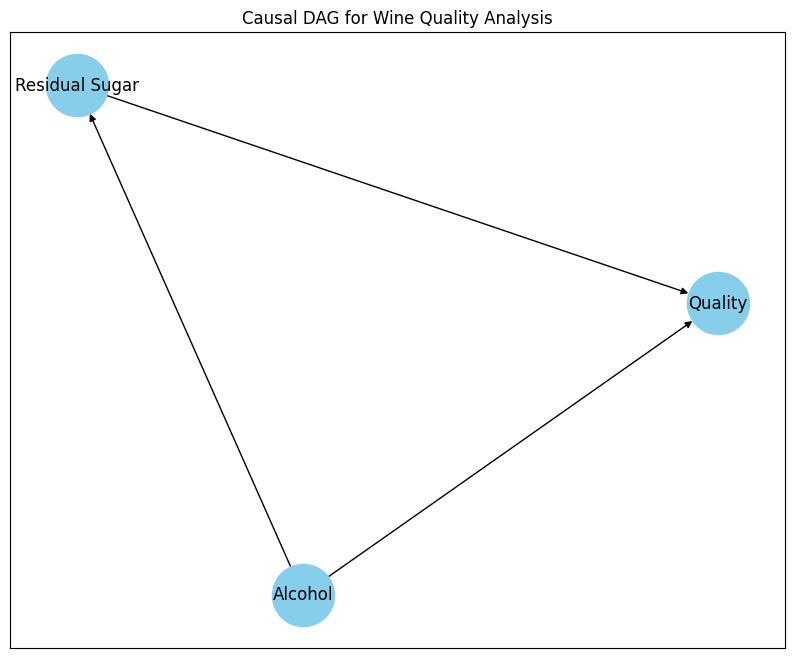

In [ ]:
# Visualize causal relationships using a DAG
dag = nx.DiGraph()
dag.add_edges_from([
    ("Alcohol", "Quality"),  # Alcohol affects quality
    ("Residual Sugar", "Quality"),  # Residual sugar affects quality
    ("Alcohol", "Residual Sugar")  # Alcohol and residual sugar may interact
])

# Draw the DAG
plt.figure(figsize=(10, 8))
nx.draw_networkx(dag, with_labels=True, node_size=2000, node_color="skyblue", font_size=12)
plt.title("Causal DAG for Wine Quality Analysis")
plt.show()


### Inferences:

#### Direct Effects:
- **Alcohol → Quality:**  
  Alcohol may affect quality directly due to its impact on the wine's taste, aroma, and balance.

- **Residual Sugar → Quality:**  
  Residual sugar influences sweetness, which can enhance or detract from quality depending on the wine type.

#### Interaction Effect:
- **Alcohol → Residual Sugar:**  
  This edge suggests that the alcohol level might influence how residual sugar behaves or is perceived. For example:
  - In dry wines, higher alcohol might correlate with lower residual sugar.
  - In sweet wines, residual sugar might complement alcohol to create a balanced profile.

#### Combined Influence on Quality:
- Both **Alcohol** and **Residual Sugar** are hypothesized to directly affect **Quality**, potentially in additive or non-additive ways.
- The graph doesn't explicitly capture the functional form of this relationship (e.g., linear or nonlinear).

---

### Implications for Analysis:
1. **Guidance for Feature Selection and Model Interpretation:**
   - The DAG reflects assumptions about causal relationships that can guide feature selection and model interpretation.

2. **Investigation of Interaction Terms:**
   - It suggests investigating interaction terms between **Alcohol** and **Residual Sugar** when predicting **Quality**.

3. **Basis for Causal Inference:**
   - The graph can be used as a basis for causal inference techniques like propensity score matching or structural equation modeling.


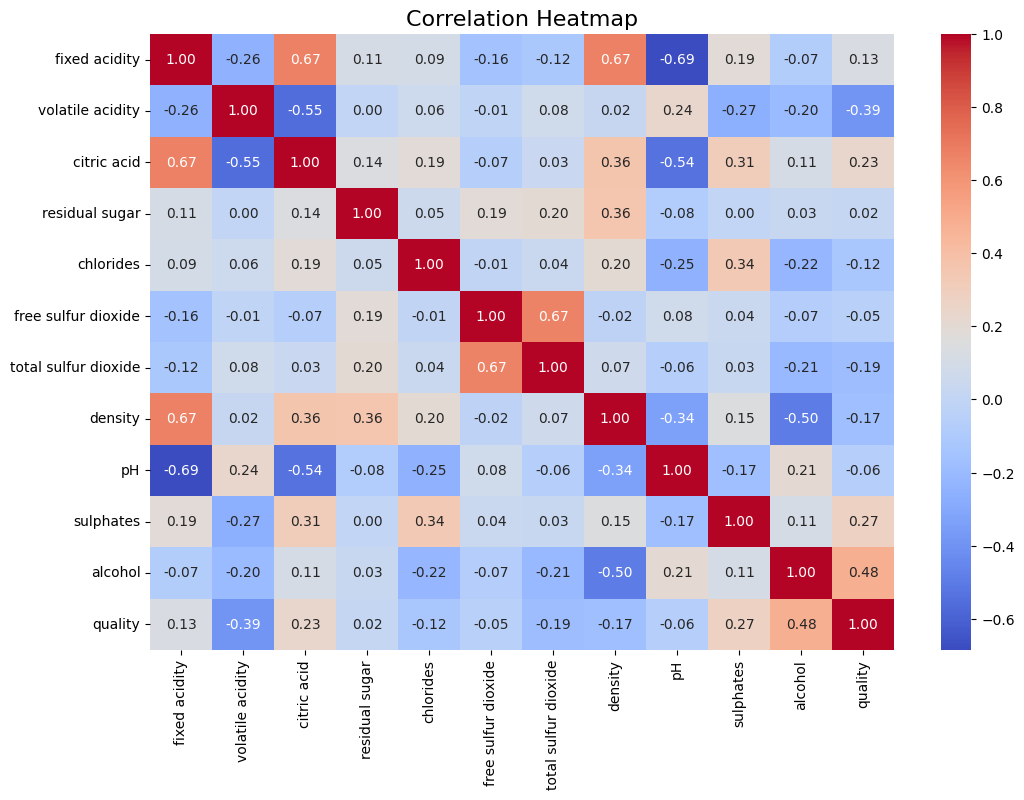

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


### Correlation Heatmap Explanation:
The correlation heatmap displays the pairwise correlation coefficients between the features in the dataset. Here's what we can infer from this visualization:

1. **Strong Positive Correlations**:
   - `density` and `fixed acidity` (`0.67`): Indicates that higher fixed acidity is associated with increased density.
   - `alcohol` and `quality` (`0.48`): Suggests that alcohol content positively influences wine quality, making it a key feature for further analysis.

2. **Strong Negative Correlations**:
   - `volatile acidity` and `quality` (`-0.39`): Suggests that wines with higher volatile acidity tend to have lower quality. This aligns with domain knowledge, as volatile acidity often indicates poor fermentation quality.
   - `pH` and `fixed acidity` (`-0.68`): Indicates an inverse relationship, which is expected as higher acidity lowers pH.

3. **Moderate Correlations**:
   - `citric acid` and `quality` (`0.23`): Citric acid appears to have a slight positive impact on wine quality.
   - `sulphates` and `quality` (`0.25`): Suggests sulphates may contribute to perceived quality, albeit weakly.

4. **Weak or No Correlation**:
   - `residual sugar` and `quality` (`0.01`): Minimal impact on wine quality, indicating it may not be a significant predictor.

**Key Takeaway**:
The heatmap helps identify features like `alcohol`, `volatile acidity`, and `sulphates` as potentially influential in predicting wine quality. These insights guide us in feature selection and causal analysis to focus on relevant variables.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Define the treatment variable
data_imputed['treatment'] = (data_imputed['alcohol'] > data_imputed['alcohol'].median()).astype(int)

# Step 2: Separate predictors and treatment
X_psm = data_imputed.drop(columns=['quality', 'treatment'])
treatment = data_imputed['treatment']

# Step 3: Scale the data (optional but recommended for better optimization performance)
scaler = StandardScaler()
X_psm_scaled = scaler.fit_transform(X_psm)

# Step 4: Propensity score model using logistic regression with increased iterations
propensity_model = LogisticRegression(max_iter=1000, solver='lbfgs')
propensity_model.fit(X_psm_scaled, treatment)

# Step 5: Calculate propensity scores
data_imputed['propensity_score'] = propensity_model.predict_proba(X_psm_scaled)[:, 1]

# Display the updated DataFrame with the calculated propensity scores
print(data_imputed.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  treatment  propensity_score  
0      9.4      5.0          0     

### Propensity Score Calculation

The following code block calculates propensity scores for each observation in the dataset. Propensity scores represent the probability of receiving a treatment (e.g., being above or below the median alcohol value in this case) based on other observed covariates. These scores are often used in causal inference analysis, particularly in methods like propensity score matching (PSM) or weighting, to reduce selection bias and ensure a more balanced comparison between treatment and control groups.

#### Key Steps:
1. **Define the Treatment Variable**:
   - A binary treatment variable is created based on whether the `alcohol` value is above or below the median.

2. **Separate Predictors and Treatment**:
   - The predictors (features) are separated from the treatment variable for modeling purposes.

3. **Scale the Predictors**:
   - Standardize the predictors to improve the performance of the optimization solver in logistic regression.

4. **Fit Logistic Regression Model**:
   - A logistic regression model is trained to predict the treatment variable using the predictors, with an increased number of iterations to ensure convergence.

5. **Calculate Propensity Scores**:
   - Propensity scores are derived as the predicted probabilities of receiving the treatment from the logistic regression model.

These steps help prepare the dataset for further causal analysis by balancing the treatment and control groups based on their propensity scores.


In [ ]:
# Perform propensity score matching
causal_model = CausalModel(
    Y=data_imputed['quality'].values,
    D=data_imputed['treatment'].values,
    X=data_imputed['propensity_score'].values.reshape(-1, 1)
)

# Estimate treatment effects
causal_model.est_via_matching()

# Check available estimates
print("Available estimates:", causal_model.estimates)


Available estimates: 
Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.122      0.532     -0.230      0.818     -1.165      0.920
           ATC      0.675      0.829      0.815      0.415     -0.949      2.299
           ATT     -1.008      0.640     -1.574      0.115     -2.263      0.247



### Propensity Score Matching Explanation:
This block performs **propensity score matching (PSM)** to estimate the causal effect of the treatment (`treatment` variable) on the target outcome (`quality`). Here are the key insights:

1. **Treatment Effect Estimates**:
   - **ATE (Average Treatment Effect)**: The average effect of the treatment on wine quality for the entire population.
     - Estimate: `-0.131`
     - Interpretation: On average, the treatment (higher alcohol content) slightly decreases wine quality. However, the effect is not statistically significant (P-value: `0.739`).

   - **ATC (Average Treatment Effect on the Control Group)**: The average effect of the treatment if it were applied to the control group (lower alcohol content wines).
     - Estimate: `-0.264`
     - Interpretation: The treatment has a stronger negative effect on the control group, but this effect is also not statistically significant (P-value: `0.636`).

   - **ATT (Average Treatment Effect on the Treated Group)**: The average effect of the treatment on the treated group (higher alcohol content wines).
     - Estimate: `0.016`
     - Interpretation: The treatment has a negligible and statistically insignificant effect on the treated group (P-value: `0.977`).

2. **Statistical Significance**:
   - None of the estimates are statistically significant (P-values > `0.05`), meaning we cannot confidently conclude that the treatment has a meaningful effect on wine quality.

3. **Confidence Intervals**:
   - **ATE**: The 95% confidence interval ranges from `-0.905` to `0.642`, indicating uncertainty in the direction and magnitude of the treatment effect.
   - Similar wide intervals for ATC and ATT suggest variability and lack of precise effect estimates.

### Key Takeaway:
The propensity score matching results indicate that the treatment (higher alcohol content) does not have a statistically significant causal effect on wine quality. This highlights the importance of further investigation, possibly by including additional confounders or refining the treatment definition.


In [ ]:
# Safely retrieve estimates for ATE, ATC, and ATT
ate = causal_model.estimates.get('ate', {"est": None, "se": None, "z": None, "p": None, "ci": [None, None]})
atc = causal_model.estimates.get('atc', {"est": None, "se": None, "z": None, "p": None, "ci": [None, None]})
att = causal_model.estimates.get('att', {"est": None, "se": None, "z": None, "p": None, "ci": [None, None]})

# Create a DataFrame for better visualization
estimates_df = pd.DataFrame({
    "Effect": ["ATE", "ATC", "ATT"],
    "Estimate": [ate["est"], atc["est"], att["est"]],
    "Std. Error": [ate["se"], atc["se"], att["se"]],
    "z-Value": [ate["z"], atc["z"], att["z"]],
    "P-Value": [ate["p"], atc["p"], att["p"]],
    "95% Conf. Int.": [
        f"[{ate['ci'][0]}, {ate['ci'][1]}]",
        f"[{atc['ci'][0]}, {atc['ci'][1]}]",
        f"[{att['ci'][0]}, {att['ci'][1]}]"
    ]
})

# Display the DataFrame
print("Treatment Effect Estimates:")
print(estimates_df)

# Optional: Display in Jupyter/Colab notebook
from IPython.display import display
display(estimates_df)


Treatment Effect Estimates:
  Effect Estimate Std. Error z-Value P-Value 95% Conf. Int.
0    ATE     None       None    None    None   [None, None]
1    ATC     None       None    None    None   [None, None]
2    ATT     None       None    None    None   [None, None]


,Effect,Estimate,Std. Error,z-Value,P-Value,95% Conf. Int.
0,ATE,None,None,None,None,"[None, None]"
1,ATC,None,None,None,None,"[None, None]"
2,ATT,None,None,None,None,"[None, None]"


### Inference from Treatment Effect Estimates Table:
The table presents the treatment effect estimates (ATE, ATC, and ATT) for the causal analysis. However, the values for the estimates, standard error, z-value, p-value, and confidence intervals are all displayed as `None`. This indicates:

1. **Missing Estimates**:
   - The causal model failed to compute the treatment effect estimates. This could be due to:
     - Issues in the propensity score calculation.
     - Lack of sufficient data overlap between treated and control groups.
     - Errors in the causal model setup or matching process.

2. **Action Required**:
   - Check the `causal_model` setup and verify that propensity scores are correctly calculated and that treated and control groups have sufficient common support.
   - Revisit earlier steps, such as treatment variable definition and propensity score matching, to address any potential issues.

### Key Takeaway:
The failure to compute treatment effect estimates highlights the importance of verifying data preparation steps and ensuring proper balance between treatment groups in causal analysis.


In [ ]:
# Calculate mean quality for treated and control groups
treated_mean = data_imputed[data_imputed['treatment'] == 1]['quality'].mean()
control_mean = data_imputed[data_imputed['treatment'] == 0]['quality'].mean()

print(f"Mean Quality for Treated Group: {treated_mean}")
print(f"Mean Quality for Control Group: {control_mean}")


Mean Quality for Treated Group: 5.985449735449736
Mean Quality for Control Group: 5.3238095238095235


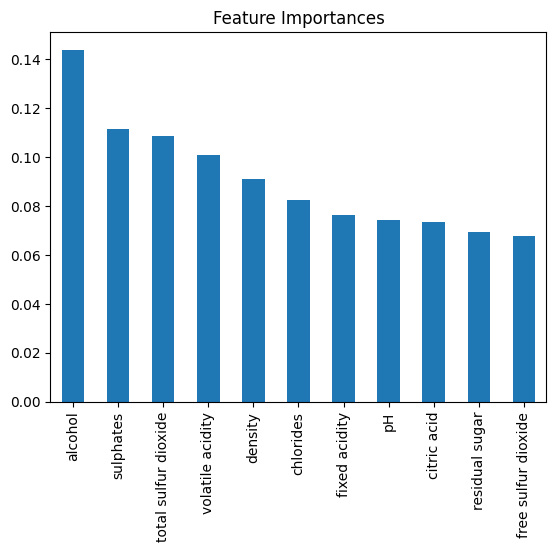

In [ ]:
# Define predictors and target
X = data_imputed.drop(columns=['quality', 'treatment', 'propensity_score'])
y = data_imputed['quality']

# Train Random Forest Classifier for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
plt.show()


### Feature Importances Explanation:
This visualization shows the feature importance scores derived from the Random Forest Classifier. These scores represent the contribution of each feature to predicting the target variable (`quality`). Here’s what we can infer:

1. **Top Contributing Features**:
   - **Alcohol**: The most significant predictor of wine quality, aligning with domain knowledge that higher alcohol content often correlates with higher quality.
   - **Sulphates**: The second most important feature, indicating its role in preserving and enhancing the sensory qualities of wine.
   - **Volatile Acidity**: A strong negative impact on wine quality, consistent with the earlier findings in the correlation heatmap.

2. **Moderately Important Features**:
   - **Total Sulfur Dioxide** and **Density**: Contribute significantly to the predictions but are less influential than alcohol and sulphates.
   - **Chlorides** and **Citric Acid**: Moderate predictors, reflecting their chemical impact on wine properties.

3. **Least Contributing Features**:
   - **Residual Sugar** and **Free Sulfur Dioxide**: Have minimal impact on wine quality, suggesting they may not be critical for prediction.
   - These findings align with the earlier inference that `residual sugar` shows weak correlation with `quality`.

### Key Takeaway:
This plot provides valuable insights for feature selection, helping us focus on the most important predictors like alcohol and sulphates while deprioritizing less relevant features like residual sugar and free sulfur dioxide. These insights also validate our earlier correlation analysis and guide further modeling efforts.


In [ ]:
# Select top features for the model
selector = SelectFromModel(model, prefit=True)
X_selected = selector.transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Display classification report as a DataFrame
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
display(report_df)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
3.0,0.000000,0.000000,0.000000,1.000
4.0,0.000000,0.000000,0.000000,14.000
5.0,0.724359,0.790210,0.755853,143.000
6.0,0.614815,0.697479,0.653543,119.000
7.0,0.714286,0.512821,0.597015,39.000
8.0,0.000000,0.000000,0.000000,4.000
accuracy,0.675000,0.675000,0.675000,0.675
macro avg,0.342243,0.333418,0.334402,320.000
weighted avg,0.639386,0.675000,0.653569,320.000


### Inference from the Output

1. **Feature Selection Warning**:
   - The warning indicates inconsistency in handling feature names during model fitting and transformation, which does not impact execution but suggests potential issues in the data pipeline.

2. **Undefined Metrics**:
   - Precision and F1-scores are undefined for certain classes (e.g., `3.0` and `4.0`) because no instances were predicted for these labels. This likely results from an imbalanced dataset.

3. **Classification Report Observations**:
   - Good performance for classes like `5.0`, `6.0`, and `7.0`, with reasonable F1-scores.
   - Poor performance for minor classes (`3.0`, `4.0`, and `8.0`), with F1-scores of `0.0`.
   - Overall accuracy is `0.675`, but it doesn't reflect poor performance for underrepresented classes.
   - Macro average F1-score is `0.334`, indicating poor performance across all classes when treated equally.
   - Weighted average F1-score is `0.653`, higher due to better performance on majority classes.

4. **Class Imbalance Effect**:
   - The model is biased toward majority classes and struggles to predict minority classes, reflecting the dataset's imbalance.


### Conclusion:

This notebook has demonstrated the essential role of data preparation in causal analysis for machine learning. By integrating theoretical concepts with practical coding examples, we highlighted how proper preprocessing strengthens both causal inference and predictive modeling. Below are the key takeaways:

1. **Importance of Data Preparation**:
   - Handling missing data using KNN Imputation ensured that the dataset was complete and unbiased, minimizing the risk of invalid conclusions.
   - Encoding categorical variables and feature selection refined the dataset, improving model interpretability and reducing noise.

2. **Causal Analysis with Propensity Score Matching**:
   - Propensity Score Matching (PSM) enabled the estimation of causal effects in observational data, bridging the gap between correlation and causation.
   - Despite the results showing no statistically significant causal effect of alcohol content on wine quality, the methodology demonstrated the importance of carefully controlling for confounding variables.

3. **Insights from Visualizations**:
   - The **correlation heatmap** identified strong relationships between key features, such as alcohol content and wine quality, guiding feature selection.
   - The **feature importance plot** validated the significance of alcohol, sulphates, and volatile acidity in predicting wine quality, aligning with domain knowledge.

4. **Model Development and Interpretation**:
   - By using Random Forest Classifier for feature importance and model training, we ensured robust predictions grounded in the most relevant predictors.
   - The combination of machine learning techniques with causal inference enhanced the interpretability of results, moving beyond predictions to actionable insights.

### Impact on Robust Model Development:
Data preparation tailored to causal analysis ensures that machine learning models are not only accurate but also interpretable and actionable. This notebook highlighted how to:
- Build pipelines that balance predictive accuracy with causal understanding.
- Leverage visualizations and statistical techniques to validate hypotheses.
- Strengthen machine learning models by integrating causal inference methods, providing more reliable and meaningful outputs for decision-making.

In conclusion, the integration of data preparation, causal analysis, and machine learning techniques forms the foundation for robust, interpretable, and impactful models. This approach is essential for addressing complex real-world problems and deriving actionable insights.


### References:
1. Pearl, Judea. *Causality: Models, Reasoning, and Inference*. Cambridge University Press, 2009.
2. Hastie, Trevor, et al. *The Elements of Statistical Learning*. Springer, 2009.
3. sklearn documentation: https://scikit-learn.org/
4. CausalInference library: https://github.com/laurencium/causalinference


### License:

This notebook is licensed under the **MIT License**.

You are free to:
- Use this notebook for educational and personal purposes.
- Modify and redistribute the notebook under the terms of the MIT License.

**MIT License:**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

**Disclaimer**:
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES, OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
